In [1]:

import pandas as pd
from pprint import pprint


In [2]:
from sklearn.tree import DecisionTreeClassifier


In [3]:
dataset= pd.read_csv('weather.csv',
                     names=['Outlook','temperature','humidity','windy','play'])

dataset.head()



,Outlook,temperature,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


In [4]:
from sklearn.preprocessing import LabelEncoder
Aminul=LabelEncoder();
dataset['out']=Aminul.fit_transform(dataset['Outlook'])
dataset['tem']=Aminul.fit_transform(dataset['temperature'])
dataset['hum']=Aminul.fit_transform(dataset['humidity'])
dataset['wind']=Aminul.fit_transform(dataset['windy'])

dataset_n=dataset.drop(['temperature','humidity','Outlook','windy','play'],axis=1)
dataset_n.head()

,out,tem,hum,wind
0,2,1,0,0
1,2,1,0,1
2,0,1,0,0
3,1,2,0,0
4,1,0,1,0


In [5]:
targets = dataset['play']


In [6]:
tree =DecisionTreeClassifier(criterion='entropy').fit(dataset_n,targets)

In [7]:
tree.score(dataset_n,targets)

1.0

In [8]:
tree.predict([[1,2,0,0]])

array(['yes'], dtype=object)

In [9]:
print("The prediction accuracy is: ",tree.score(dataset_n,targets)*100,"%")

The prediction accuracy is:  100.0 %


/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


Decision Tree


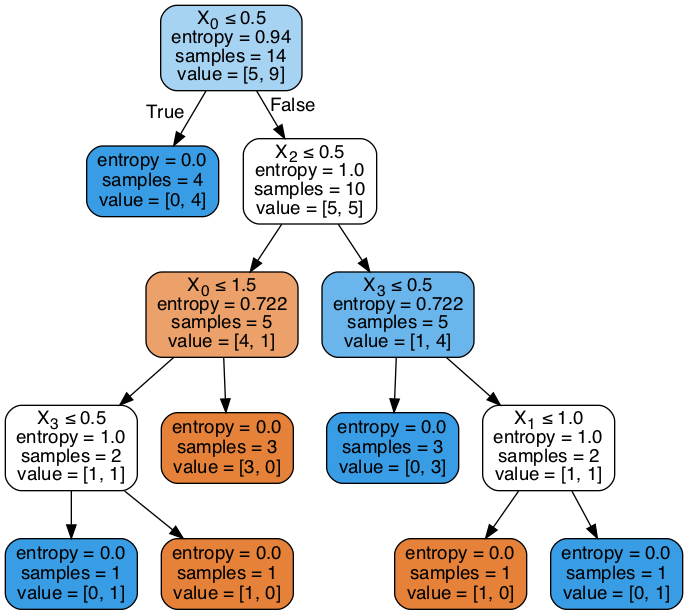

In [10]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
print("Decision Tree")
Image(graph.create_png())